# App dataset with decision trees

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
app_dataset = pd.DataFrame({
    'Gender': ['Female','Female','Male','Female','Male','Male'],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Atom Count', 'Check Mate Mate', 'Beehive Finder', 'Check Mate Mate', 'Atom Count', 'Atom Count']})
app_dataset

,Gender,Age,App
0,Female,15,Atom Count
1,Female,25,Check Mate Mate
2,Male,32,Beehive Finder
3,Female,35,Check Mate Mate
4,Male,12,Atom Count
5,Male,14,Atom Count


In [3]:
app_dataset_one_hot = pd.DataFrame(
    {'Gender_Female':[1,1,0,1,0,0],
     'Gender_Male':[0,0,1,0,1,1],
     'Age_Young':[1,0,0,0,1,1],
     'Age_Old':[0,1,1,1,0,0],
     'App_Atom_Count':[1,0,0,0,1,1],
     'App_Beehive_Finder':[0,0,1,0,0,0],
     'App_Check_Mate_Mate':[0,1,0,1,0,0]})
app_dataset_one_hot

,Gender_Female,Gender_Male,Age_Young,Age_Old,App_Atom_Count,App_Beehive_Finder,App_Check_Mate_Mate
0,1,0,1,0,1,0,0
1,1,0,0,1,0,0,1
2,0,1,0,1,0,1,0
3,1,0,0,1,0,0,1
4,0,1,1,0,1,0,0
5,0,1,1,0,1,0,0


In [4]:
X = app_dataset_one_hot[['Gender_Female','Gender_Male','Age_Old','Age_Young']]
y = app_dataset_one_hot[['App_Atom_Count','App_Beehive_Finder','App_Check_Mate_Mate']]

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X,y)
dt.score(X,y)

1.0

In [6]:
X

,Gender_Female,Gender_Male,Age_Old,Age_Young
0,1,0,0,1
1,1,0,1,0
2,0,1,1,0
3,1,0,1,0
4,0,1,0,1
5,0,1,0,1


In [7]:
y

,App_Atom_Count,App_Beehive_Finder,App_Check_Mate_Mate
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0
5,1,0,0


/Users/luisserrano/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


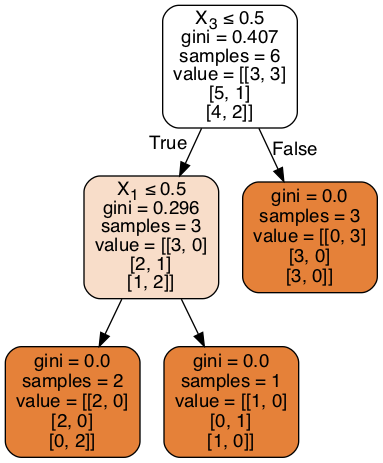

In [8]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [9]:
app_dataset = pd.DataFrame({
    'Gender_Female':[1,1,0,1,0,0],
    'Gender_Male':[0,0,1,0,1,1],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Atom Count', 'Check Mate Mate', 'Beehive Finder', 'Check Mate Mate', 'Atom Count', 'Atom Count']})
print(app_dataset)

   Gender_Female  Gender_Male  Age              App
0              1            0   15       Atom Count
1              1            0   25  Check Mate Mate
2              0            1   32   Beehive Finder
3              1            0   35  Check Mate Mate
4              0            1   12       Atom Count
5              0            1   14       Atom Count


In [10]:
features = app_dataset[['Age','Gender_Female','Gender_Male']]
print(features)

   Age  Gender_Female  Gender_Male
0   15              1            0
1   25              1            0
2   32              0            1
3   35              1            0
4   12              0            1
5   14              0            1


In [11]:
labels = app_dataset['App']
print(labels)

0         Atom Count
1    Check Mate Mate
2     Beehive Finder
3    Check Mate Mate
4         Atom Count
5         Atom Count
Name: App, dtype: object


In [12]:
app_model = DecisionTreeClassifier()
app_model.fit(features, labels)
app_model.score(features, labels)

1.0

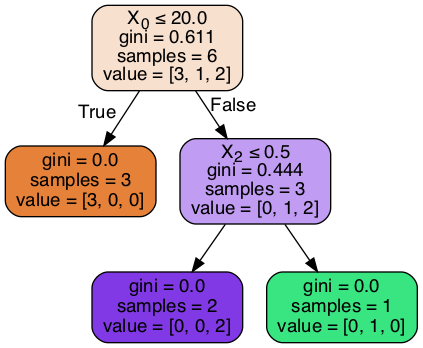

In [13]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(app_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Gini index calculation

In [14]:
from __future__ import division

In [15]:
elements = ['A', 'A', 'A', 'C', 'B', 'C']
def counts(elements):
    classes = {}
    for element in elements:
        if element in classes:
            classes[element] += 1
        else:
            classes[element] = 1
    return [classes[e] for e in classes]
counts(elements)

[3, 2, 1]

In [16]:
def gini(counts):
    n = sum(counts)
    return 1 - sum([p_i**2/n**2 for p_i in counts])
gini(counts(elements))

0.6111111111111112

In [17]:
# Splitting age on 13
gini(counts(elements)) - (gini([1])*1/6 + gini([2,1,2])*5/6)

0.07777777777777783

In [18]:
# Splitting age on 14.5
gini(counts(elements)) - (gini([2])*2/6 + gini([1,1,2])*4/6)

0.19444444444444448

In [19]:
# Splitting age on 20
gini(counts(elements)) - (gini([3])*3/6 + gini([1,2])*3/6)

0.38888888888888895

In [20]:
# Splitting age on 27
gini(counts(elements)) - (gini([3,1])*4/6 + gini([1,1])*2/6)

0.19444444444444453

In [21]:
# Splitting age on 33
gini(counts(elements)) - (gini([3,1,1])*5/6 + gini([1])*1/6)

0.14444444444444443

# Spam example

In [22]:
spam_dataset = pd.DataFrame({
    'Lottery':[7,3,9,1,2,4,1,3,6,7,8,9],
    'Sale':[1,2,3,3,6,7,9,10,5,8,4,6],
    'Spam': [0,0,0,0,0,0,1,1,1,1,1,1]}) #'no','no','no','no','no','no','yes','yes','yes','yes','yes','yes'

spam_dataset

,Lottery,Sale,Spam
0,7,1,0
1,3,2,0
2,9,3,0
3,1,3,0
4,2,6,0
5,4,7,0
6,1,9,1
7,3,10,1
8,6,5,1
9,7,8,1


In [28]:
# Some functions to plot our points and draw the models
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 25,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 25,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('Sale')
    plt.ylabel('Lottery')
    plt.legend(['spam','ham'])

def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    print(Z)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    plt.contour(xx, yy, Z,colors = 'k',linewidths = 1)
    plot_points(X, y)
    plt.show()

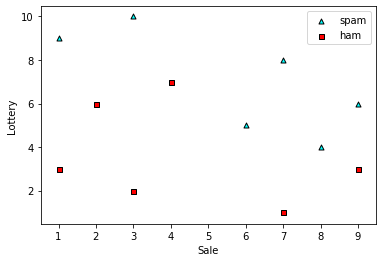

In [24]:
X = spam_dataset[['Lottery', 'Sale']]
y = spam_dataset['Spam']

plot_points(X, y)

In [25]:
X = spam_dataset[['Lottery', 'Sale']]
y = spam_dataset['Spam']
spam_decision_tree = DecisionTreeClassifier()
spam_decision_tree.fit(X,y)
spam_decision_tree.score(X,y)

1.0

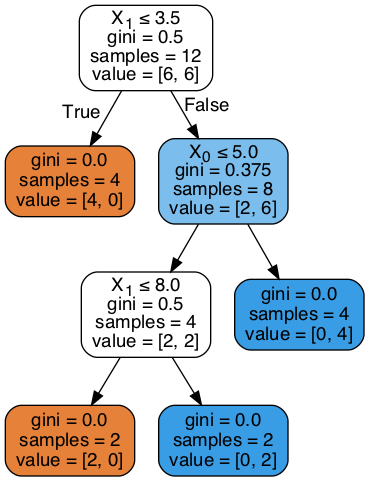

In [26]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(spam_decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


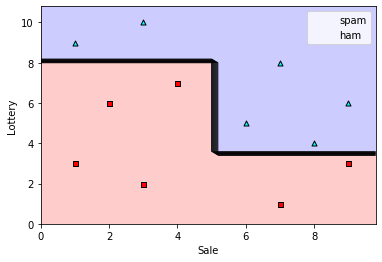

In [29]:
plot_model(X, y, spam_decision_tree)